# What is the role of keypoints in image processing?

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


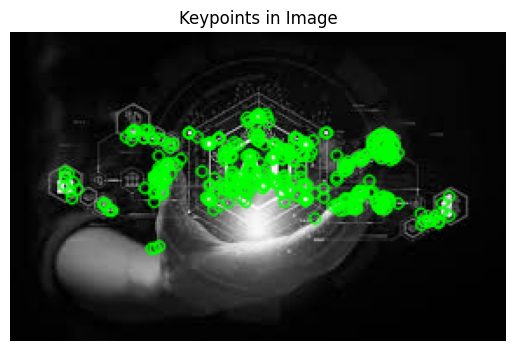

In [2]:
# Load image
image = cv2.imread('/content/drive/MyDrive/Computer Vision/AI.jpg', 0)  # Load in grayscale

# Detect keypoints using ORB
orb = cv2.ORB_create()
keypoints = orb.detect(image, None)

# Draw keypoints
image_with_kp = cv2.drawKeypoints(image, keypoints, None, color=(0,255,0))

# Display
plt.imshow(image_with_kp)
plt.title("Keypoints in Image")
plt.axis('off')
plt.show()


# What are the main components of the ORB algorithm?

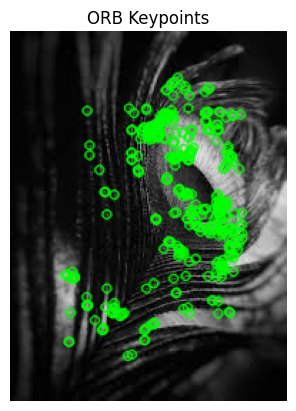

In [3]:
# Load image
image = cv2.imread('/content/drive/MyDrive/Computer Vision/Sample.jpg', 0)

# ORB detection and computation
orb = cv2.ORB_create()
keypoints, descriptors = orb.detectAndCompute(image, None)

# Visualize keypoints
image_kp = cv2.drawKeypoints(image, keypoints, None, color=(0, 255, 0))
plt.imshow(image_kp)
plt.title("ORB Keypoints")
plt.axis('off')
plt.show()


# Why is SIFT considered more robust than ORB?

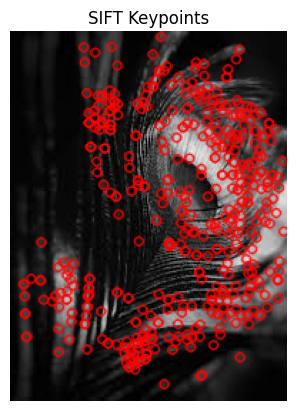

In [4]:
# Load image
image = cv2.imread('/content/drive/MyDrive/Computer Vision/Sample.jpg', 0)

# Use SIFT
sift = cv2.SIFT_create()
keypoints, descriptors = sift.detectAndCompute(image, None)

# Draw keypoints
image_kp = cv2.drawKeypoints(image, keypoints, None, color=(255, 0, 0))
plt.imshow(image_kp)
plt.title("SIFT Keypoints")
plt.axis('off')
plt.show()


# What is the role of Brute-Force Matcher?

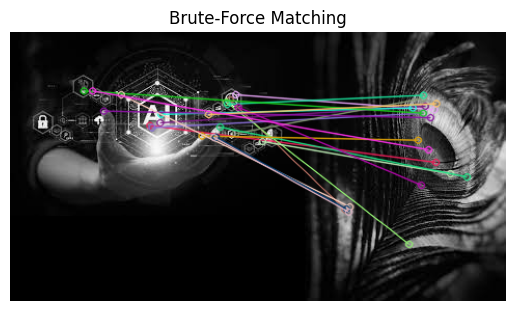

In [5]:
# Load two images
img1 = cv2.imread('/content/drive/MyDrive/Computer Vision/AI.jpg', 0)
img2 = cv2.imread('/content/drive/MyDrive/Computer Vision/Sample.jpg', 0)

# ORB keypoints and descriptors
orb = cv2.ORB_create()
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

# Brute-Force Matcher
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)
matches = sorted(matches, key=lambda x: x.distance)

# Draw matches
match_img = cv2.drawMatches(img1, kp1, img2, kp2, matches[:20], None, flags=2)
plt.imshow(match_img)
plt.title("Brute-Force Matching")
plt.axis('off')
plt.show()


# What do you understand by descriptor matching?

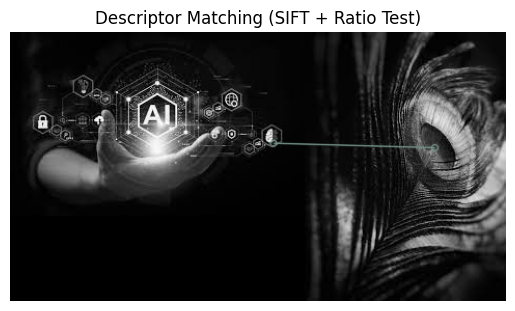

In [6]:
# Use SIFT for better descriptor visualization
img1 = cv2.imread('/content/drive/MyDrive/Computer Vision/AI.jpg', 0)
img2 = cv2.imread('/content/drive/MyDrive/Computer Vision/Sample.jpg', 0)

sift = cv2.SIFT_create()
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

# Apply ratio test (Lowe’s)
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

# Draw good matches
matched_img = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None, flags=2)
plt.imshow(matched_img)
plt.title("Descriptor Matching (SIFT + Ratio Test)")
plt.axis('off')
plt.show()


# What types of applications use feature matching?

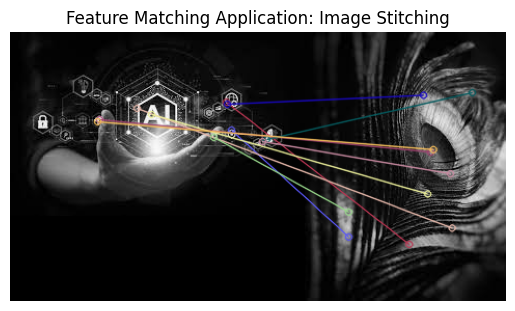

In [7]:
# Example: Image stitching feature matching (OR use in AR)
img1 = cv2.imread('/content/drive/MyDrive/Computer Vision/AI.jpg', 0)
img2 = cv2.imread('/content/drive/MyDrive/Computer Vision/Sample.jpg', 0)

orb = cv2.ORB_create()
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)

stitched = cv2.drawMatches(img1, kp1, img2, kp2, matches[:10], None, flags=2)
plt.imshow(stitched)
plt.title("Feature Matching Application: Image Stitching")
plt.axis('off')
plt.show()
